# Visualization of Results
This takes all results of the newly methods as well as the best PageRank of our Implementation.
They are plotted against the PageRank of Wachsmuth et. al. 2017.

### Create Paths

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from frequency.Frequency import Frequency
from pagerank.OriginalPageRank import OriginalPageRank
from pagerank.PaperPageRank import PaperPageRank
from randomized.RandomScore import calculate_random_score
from sentiment.NeuralNetworkSentimentClassification import NeuralNetworkSentiment
from sentiment.Sentiment import SentiWordNet
from similarity.SemanticSimilarity import SemanticSimilarity, GloveSemanticSimilarity
from similarity.Similarity import caclulate_jaccard_similarity
from similarity.WordNetSentenceSimilarity import wordnet_knowledge_similarity, wordnet_knowledge_similarity_averaged
from utils.Aggregation import min_aggregation, max_aggregation, avg_aggregation, sum_aggregation, \
    min_sentiment_aggregation, max_sentiment_aggregation
from utils.Correlation import calculate_kendall_correlation
from most_premises.MostPremises import calculcate_most_premises
PATH_GROUND_TRUTH_LIST = "../Webis-ArgRank-17-Dataset/ground-truth-list.csv"
PATH_GROUND_TRUTH_JSON = "../Graph-Construction/groundtruth.json"
PATH_NODE_MAPPING_JSON = "../Graph-Construction/node_mapping.json"
PATH_ARGUMENT_LIST = "../Webis-ArgRank-17-Dataset/argument-list.csv"
PATH_ARGUMENT_UNIT_LIST = "../Webis-ArgRank-17-Dataset/argument-unit-list.csv"
PATH_GENERATED_PAGE_RANK_DATA = "./pagerank/data"
PATH_GENERATED_EMBEDDINGS_DATA = "./similarity/embeddings/"
PATH_SENTIWORDNET = "./sentiment/data/SentiWordNet_3.0.0_20130122.txt"
PATH_MODEL = "./sentiment/data/nn_sentiment_model.pt"




In [2]:
def calculate_rankings(method, sentiment_aggregation:bool=False) -> dict:
    """
    This method calculates kendall correlations for all aggregations.
    
    :param sentiment_aggregation: Should the aggregation for the sentiment be used.
    :param method: Method which should be applied. 
    :return: Dict with all infos and results about the kendall correlation ot the method to each aggregation.
    """
    aggregations = [
        min_aggregation,
        avg_aggregation,
        max_aggregation,
        sum_aggregation
    ]
    
    if sentiment_aggregation:
        aggregations = [
                min_sentiment_aggregation,
                avg_aggregation,
                max_sentiment_aggregation,
                sum_aggregation
            ] 
    
    keys = ["min", "avg", "max", "sum"]
    results = {}
    for i in range(0, 4):
        tau, tau_dict = calculate_kendall_correlation(score_function=method,
                                                      aggregation_function=aggregations[i],
                                                      path_ground_truth_list=PATH_GROUND_TRUTH_LIST,
                                                      path_argument_list=PATH_ARGUMENT_LIST)
        results[keys[i]] = {
            "tau" : tau,
            "tau_dict" : tau_dict
        }
        print("Done with {}, {}".format(method, keys[i]))
    return results

### Get tau values for the PageRank in the Paper

In [3]:
paper_pager_rank = PaperPageRank(path_argument_unit_list = PATH_ARGUMENT_UNIT_LIST)

paper_pager_rank_results = calculate_rankings(paper_pager_rank.calculate_paper_page_rank)

Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x11176e490>>, min
Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x11176e490>>, avg
Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x11176e490>>, max
Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x11176e490>>, sum


### Get tau values for our PageRank implementation

In [4]:
original_page_rank = OriginalPageRank(alpha=0.0,
                                      epochs=1,
                                      suffix='_fixed_epochs',
                                      path=PATH_GENERATED_PAGE_RANK_DATA,
                                      path_argument_unit_list=PATH_ARGUMENT_UNIT_LIST,
                                      path_ground_truth=PATH_GROUND_TRUTH_JSON,
                                      path_node_mapping=PATH_NODE_MAPPING_JSON)

original_pager_rank_results = calculate_rankings(original_page_rank.calculate_original_page_rank)

Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x137aa26d0>>, min
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x137aa26d0>>, avg
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x137aa26d0>>, max
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x137aa26d0>>, sum


### Get tau values for Frequency

In [5]:
frequency = Frequency(path_argument_unit_list=PATH_ARGUMENT_UNIT_LIST) 
frequency_results = calculate_rankings(frequency.get_frequency_score)

Done with <bound method Frequency.get_frequency_score of <frequency.Frequency.Frequency object at 0x13be61510>>, min
Done with <bound method Frequency.get_frequency_score of <frequency.Frequency.Frequency object at 0x13be61510>>, avg
Done with <bound method Frequency.get_frequency_score of <frequency.Frequency.Frequency object at 0x13be61510>>, max
Done with <bound method Frequency.get_frequency_score of <frequency.Frequency.Frequency object at 0x13be61510>>, sum


### Get tau values for Random

In [6]:
random_results = calculate_rankings(calculate_random_score)

Done with <function calculate_random_score at 0x118dbb440>, min
Done with <function calculate_random_score at 0x118dbb440>, avg
Done with <function calculate_random_score at 0x118dbb440>, max
Done with <function calculate_random_score at 0x118dbb440>, sum


### Get tau values for Similarity

In [7]:
jaccard_similarity_results = calculate_rankings(caclulate_jaccard_similarity)

Done with <function caclulate_jaccard_similarity at 0x136150950>, min
Done with <function caclulate_jaccard_similarity at 0x136150950>, avg
Done with <function caclulate_jaccard_similarity at 0x136150950>, max
Done with <function caclulate_jaccard_similarity at 0x136150950>, sum


In [8]:
elmo_with_punctuation = SemanticSimilarity(path_to_embedding = PATH_GENERATED_EMBEDDINGS_DATA,
                                           file_name="elmo_embeddings_with_punctuation.json")
elmo_with_punctuation_results = calculate_rankings(elmo_with_punctuation.calculate_similarity)


Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x137aa2b50>>, min
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x137aa2b50>>, avg
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x137aa2b50>>, max
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x137aa2b50>>, sum


In [9]:
elmo_without_punctuation = SemanticSimilarity(path_to_embedding = PATH_GENERATED_EMBEDDINGS_DATA,
                                           file_name="elmo_embeddings_without_punctuation.json")
elmo_without_punctuation_results = calculate_rankings(elmo_without_punctuation.calculate_similarity)

Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1394cc210>>, min
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1394cc210>>, avg
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1394cc210>>, max
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1394cc210>>, sum


In [10]:
bert_with_punctuation = SemanticSimilarity(path_to_embedding = PATH_GENERATED_EMBEDDINGS_DATA,
                                           file_name="bert_embeddings_with_punctuation.json")
bert_with_punctuation_results = calculate_rankings(bert_with_punctuation.calculate_similarity)


Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x141e27850>>, min
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x141e27850>>, avg
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x141e27850>>, max
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x141e27850>>, sum


In [11]:
bert_without_punctuation = SemanticSimilarity(path_to_embedding = PATH_GENERATED_EMBEDDINGS_DATA,
                                           file_name="bert_embeddings_without_punctuation.json")
bert_without_punctuation_results = calculate_rankings(bert_without_punctuation.calculate_similarity)

Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1395a7190>>, min
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1395a7190>>, avg
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1395a7190>>, max
Done with <bound method SemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.SemanticSimilarity object at 0x1395a7190>>, sum


In [12]:
glove_with_punctuation_results = calculate_rankings(GloveSemanticSimilarity(remove_punctuation=False).calculate_similarity)

Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x14354f850>>, min
Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x14354f850>>, avg
Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x14354f850>>, max
Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x14354f850>>, sum


In [13]:
glove_without_punctuation_results = calculate_rankings(GloveSemanticSimilarity(remove_punctuation=True).calculate_similarity)

Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x143665410>>, min
Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x143665410>>, avg
Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x143665410>>, max
Done with <bound method GloveSemanticSimilarity.calculate_similarity of <similarity.SemanticSimilarity.GloveSemanticSimilarity object at 0x143665410>>, sum


In [14]:
wordnet_similarity_weighted_results = calculate_rankings(wordnet_knowledge_similarity)


Done with <function wordnet_knowledge_similarity at 0x1376fd680>, min
Done with <function wordnet_knowledge_similarity at 0x1376fd680>, avg
Done with <function wordnet_knowledge_similarity at 0x1376fd680>, max
Done with <function wordnet_knowledge_similarity at 0x1376fd680>, sum


In [15]:
wordnet_similarity_averaged_results = calculate_rankings(wordnet_knowledge_similarity_averaged)


Done with <function wordnet_knowledge_similarity_averaged at 0x1376fd710>, min
Done with <function wordnet_knowledge_similarity_averaged at 0x1376fd710>, avg
Done with <function wordnet_knowledge_similarity_averaged at 0x1376fd710>, max
Done with <function wordnet_knowledge_similarity_averaged at 0x1376fd710>, sum


### Get tau values for Sentiment

In [16]:
senti_wordnet = SentiWordNet(path_sentiwordnet = PATH_SENTIWORDNET)
senti_wordnet_results =  calculate_rankings(senti_wordnet.calculate_sentiment, sentiment_aggregation=True)


Done with <bound method SentiWordNet.calculate_sentiment of <sentiment.Sentiment.SentiWordNet object at 0x149a5b610>>, min
Done with <bound method SentiWordNet.calculate_sentiment of <sentiment.Sentiment.SentiWordNet object at 0x149a5b610>>, avg
Done with <bound method SentiWordNet.calculate_sentiment of <sentiment.Sentiment.SentiWordNet object at 0x149a5b610>>, max
Done with <bound method SentiWordNet.calculate_sentiment of <sentiment.Sentiment.SentiWordNet object at 0x149a5b610>>, sum


In [17]:
sentiment_neuronal_network = NeuralNetworkSentiment(model_path=PATH_MODEL)
sentiment_neuronal_network_only_positive_results =  calculate_rankings(sentiment_neuronal_network.predict_sentiment, sentiment_aggregation=True)

Done with <bound method NeuralNetworkSentiment.predict_sentiment of <sentiment.NeuralNetworkSentimentClassification.NeuralNetworkSentiment object at 0x14a346c50>>, min
Done with <bound method NeuralNetworkSentiment.predict_sentiment of <sentiment.NeuralNetworkSentimentClassification.NeuralNetworkSentiment object at 0x14a346c50>>, avg
Done with <bound method NeuralNetworkSentiment.predict_sentiment of <sentiment.NeuralNetworkSentimentClassification.NeuralNetworkSentiment object at 0x14a346c50>>, max
Done with <bound method NeuralNetworkSentiment.predict_sentiment of <sentiment.NeuralNetworkSentimentClassification.NeuralNetworkSentiment object at 0x14a346c50>>, sum


## Get tau values for most premises

In [18]:
most_premises_results = calculate_rankings(calculcate_most_premises)

Done with <function calculcate_most_premises at 0x137a79e60>, min
Done with <function calculcate_most_premises at 0x137a79e60>, avg
Done with <function calculcate_most_premises at 0x137a79e60>, max
Done with <function calculcate_most_premises at 0x137a79e60>, sum


### Plot results

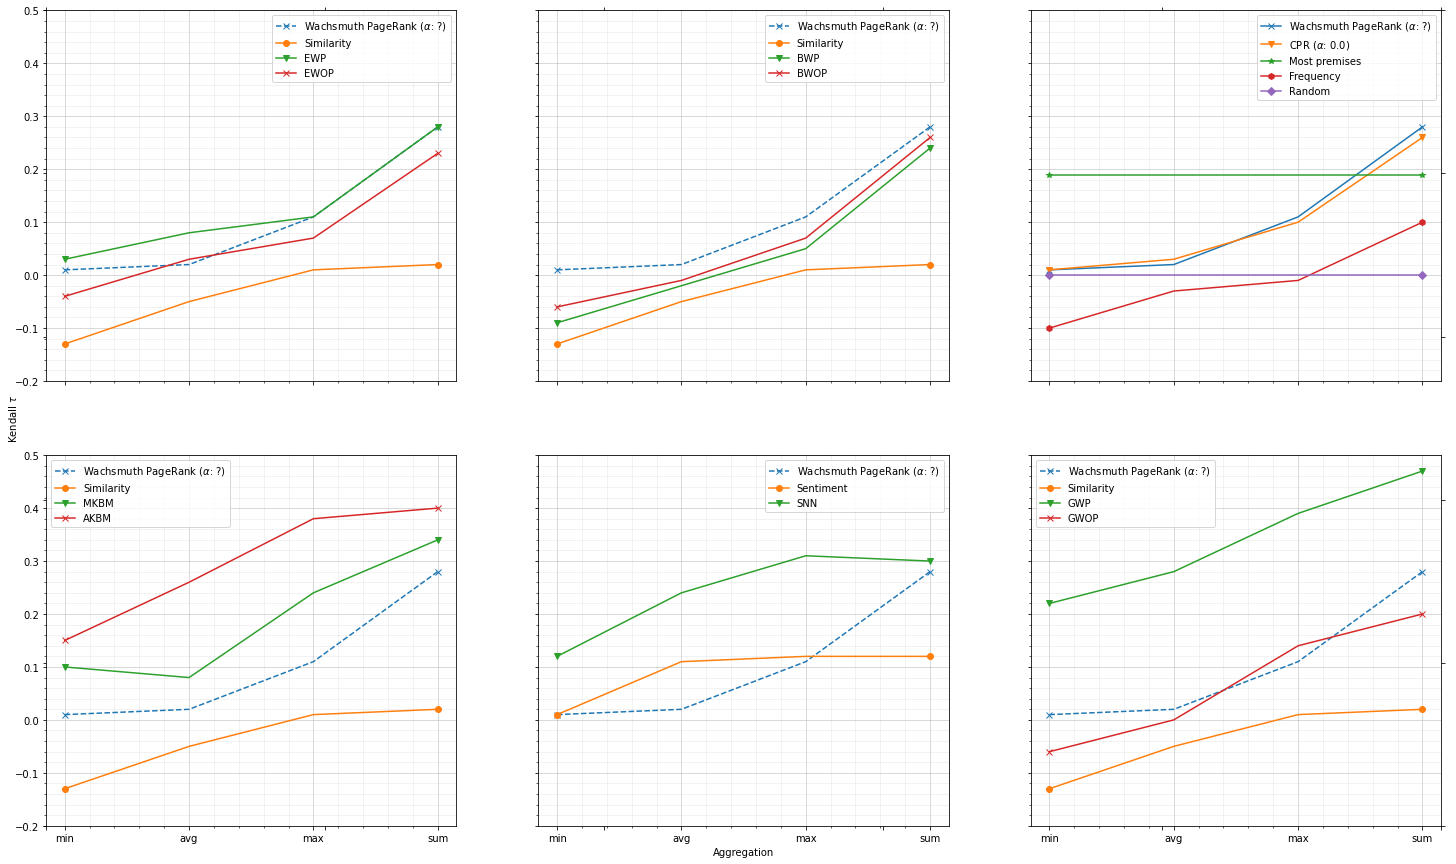

In [19]:
#plt.figure(figsize=(12,7.5))
aggregations = ["min", "avg", "max", "sum"]

paper_page_rank_per_aggregation = [paper_pager_rank_results[aggregation]['tau'] for aggregation in aggregations]
original_page_rank_per_aggregation = [original_pager_rank_results[aggregation]['tau'] for aggregation in aggregations]
frequency_per_aggregation = [frequency_results[aggregation]['tau'] for aggregation in aggregations]
jaccard_similarity_per_aggregation = [jaccard_similarity_results[aggregation]['tau'] for aggregation in aggregations]
senti_wordnet_per_aggregation = [senti_wordnet_results[aggregation]['tau'] for aggregation in aggregations]    
most_premises_per_aggregation = [most_premises_results[aggregation]['tau'] for aggregation in aggregations]    
random_per_aggregation = [random_results[aggregation]['tau'] for aggregation in aggregations]

elmo_with_punctuation_per_aggregation = [elmo_with_punctuation_results[aggregation]['tau'] for aggregation in aggregations]
elmo_without_punctuation_per_aggregation = [elmo_without_punctuation_results[aggregation]['tau'] for aggregation in aggregations]
bert_with_punctuation_per_aggregation = [bert_with_punctuation_results[aggregation]['tau'] for aggregation in aggregations]
bert_without_punctuation_per_aggregation = [bert_without_punctuation_results[aggregation]['tau'] for aggregation in aggregations]
glove_with_punctuation_per_aggregation = [glove_with_punctuation_results[aggregation]['tau'] for aggregation in aggregations]
glove_without_punctuation_per_aggregation = [glove_without_punctuation_results[aggregation]['tau'] for aggregation in aggregations]
wordnet_weighted_per_aggregation = [wordnet_similarity_weighted_results[aggregation]['tau'] for aggregation in aggregations]    
wordnet_averaged_per_aggregation = [wordnet_similarity_averaged_results[aggregation]['tau'] for aggregation in aggregations]    
senti_neuronal_network_per_aggregation = [sentiment_neuronal_network_only_positive_results[aggregation]['tau'] for aggregation in aggregations]    


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,  sharex=True, sharey=True, figsize=(25,15))
#fig.suptitle('Approaches in Comparison')
fig.add_subplot(111, frameon=False)
ax1.plot(aggregations, paper_page_rank_per_aggregation, marker='x', label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'), ls='--', markevery=[0,-1])
ax1.plot(aggregations, jaccard_similarity_per_aggregation,marker='o', label='Similarity', ls='-', markevery=[0,-1])      
ax1.plot(aggregations, elmo_with_punctuation_per_aggregation, marker='v', label='EWP',ls='-', markevery=[0,-1])      
ax1.plot(aggregations, elmo_without_punctuation_per_aggregation, marker='x', label='EWOP', ls='-', markevery=[0,-1]) 
ax1.legend()
ax1.set_ylim([-0.2, 0.5])
#ax1.set_ylabel("Direct Context")
ax1.minorticks_on()
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.6)

ax2.plot(aggregations, paper_page_rank_per_aggregation, marker='x', label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'), ls='--', markevery=[0,-1])
ax2.plot(aggregations, jaccard_similarity_per_aggregation,marker='o', label='Similarity', ls='-', markevery=[0,-1])
ax2.plot(aggregations, bert_with_punctuation_per_aggregation,marker='v', label='BWP',ls='-', markevery=[0,-1])
ax2.plot(aggregations, bert_without_punctuation_per_aggregation,marker='x' , label='BWOP', ls='-', markevery=[0,-1])
ax2.legend()
ax2.set_ylim([-0.2, 0.5])
ax2.minorticks_on()
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.6)


ax6.plot(aggregations, paper_page_rank_per_aggregation, marker='x', label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'), ls='--', markevery=[0,-1])
ax6.plot(aggregations, jaccard_similarity_per_aggregation, marker='o', label='Similarity', ls='-', markevery=[0,-1])
ax6.plot(aggregations, glove_with_punctuation_per_aggregation,marker='v', label='GWP', ls='-', markevery=[0,-1])
ax6.plot(aggregations, glove_without_punctuation_per_aggregation,marker='x', label='GWOP', ls='-', markevery=[0,-1])
ax6.legend()
ax6.set_ylim([-0.2, 0.5])
ax6.minorticks_on()
ax6.grid(which='minor', alpha=0.2)
ax6.grid(which='major', alpha=0.6)

ax4.plot(aggregations, paper_page_rank_per_aggregation, marker='x', label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'), ls='--', markevery=[0,-1])
ax4.plot(aggregations, jaccard_similarity_per_aggregation, marker= 'o', label='Similarity', ls='-', markevery=[0,-1])
ax4.plot(aggregations, wordnet_weighted_per_aggregation, marker='v' ,label='MKBM', ls='-', markevery=[0,-1])
ax4.plot(aggregations, wordnet_averaged_per_aggregation, marker='x' ,label='AKBM', ls='-', markevery=[0,-1])
ax4.legend()
ax4.set_ylim([-0.2, 0.5])
#ax4.set_ylabel("Indirect Context")
ax4.minorticks_on()
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.6)

ax5.plot(aggregations, paper_page_rank_per_aggregation, marker='x', label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'), ls='--', markevery=[0,-1])
ax5.plot(aggregations, senti_wordnet_per_aggregation,marker='o', label='Sentiment', ls='-', markevery=[0,-1])
ax5.plot(aggregations, senti_neuronal_network_per_aggregation, marker= 'v', label='SNN', ls='-', markevery=[0,-1])
ax5.legend()
ax5.set_ylim([-0.2, 0.5])
ax5.minorticks_on()
ax5.grid(which='minor', alpha=0.2)
ax5.grid(which='major', alpha=0.6)

ax3.plot(aggregations, paper_page_rank_per_aggregation, marker='x', label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'), ls='-', markevery=[0,-1])
ax3.plot(aggregations, original_page_rank_per_aggregation, marker= 'v', label='CPR ('+r'$\alpha$'+': {})'.format('0.0'), ls='-', markevery=[0,-1])
ax3.plot(aggregations, most_premises_per_aggregation, marker= '*', label='Most premises', ls='-', markevery=[0,-1])    
ax3.plot(aggregations, frequency_per_aggregation, marker='h', label='Frequency', ls='-', markevery=[0,-1])      
ax3.plot(aggregations, random_per_aggregation, marker = 'D', label='Random', ls='-', markevery=[0,-1])   
ax3.legend()
ax3.set_ylim([-0.2, 0.5])
ax3.minorticks_on()
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.6)

for ax in fig.get_axes():
    ax.label_outer()
    


#fig.text(0.5, 0.04, 'Aggregation', ha='center', va='center', fontsize=20)
#fig.text(0.06, 0.5, 'Kendall ' + r'$\tau$', ha='center', va='center', rotation='vertical', fontsize=20)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Aggregation")
plt.ylabel('Kendall ' + r'$\tau$')
 
plt.savefig('./pictures/PairwiseResultComparison.svg', bbox_inches='tight')
plt.show()
